# FORECASTNG STOCK MARKET TRENDS

EDS 6340 INTRODUCTION TO DATA SCIENCE

GROUP 16


| **Name**                | **ID**      |
|-------------------------|-------------|
| Sai Shashank Gandavarapu | 2402666     |
| Aakanksha Govindaraju    | 2384001     |
| Gowtham Chowdam          | 2397801     |
| Kiran Kulkarni           | 2330104     |
| Nagesh Vaka              | 2407326     |


## Importing Packages

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

## Load the Dataset

In [ ]:
df = pd.read_csv('Cleaned&Processed_Data.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head(15)

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU,DJI,S&P
0,2009-12-31,10428.049805,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.000640,0.000697
1,2009-12-31,1115.099976,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
2,2009-12-31,2269.149902,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.000697
3,2009-12-31,7184.959961,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
4,2009-12-31,625.390015,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,-1.08,-1.00,-0.11,-0.08,-0.06,-0.48,0.30,0.39,0.014951,0.016043
5,2010-01-04,10583.959961,0.515598,0.014951,0.014951,0.014951,0.014951,1.823357,1.741463,-2.216996,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.000640,0.000697
6,2010-01-04,2308.419922,0.000000,0.017306,0.017306,0.017306,0.017306,2.116212,0.830271,-2.571441,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
7,2010-01-04,1132.989990,-0.001074,0.016043,0.016043,0.016043,0.016043,2.679581,1.876967,-1.642897,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.000697
8,2010-01-04,7326.740234,-0.001183,0.019733,0.019733,0.019733,0.019733,3.345741,2.391525,-1.556447,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043
9,2010-01-04,640.099976,-0.001074,0.023521,0.023521,0.023521,0.023521,3.065284,2.009947,-1.164078,...,1.61,1.62,-0.57,-0.59,-0.42,3.12,3.91,2.10,0.014951,0.016043


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) plays a pivotal role in understanding the structure and patterns of the stock market dataset. The analysis began with summary statistics, which provided key insights into the data’s central tendency and variability through metrics like the mean, median, and standard deviation.

Correlation matrices were generated to uncover relationships between indices, and scatter plots and pair plots explored potential linear and non-linear relationships between features.

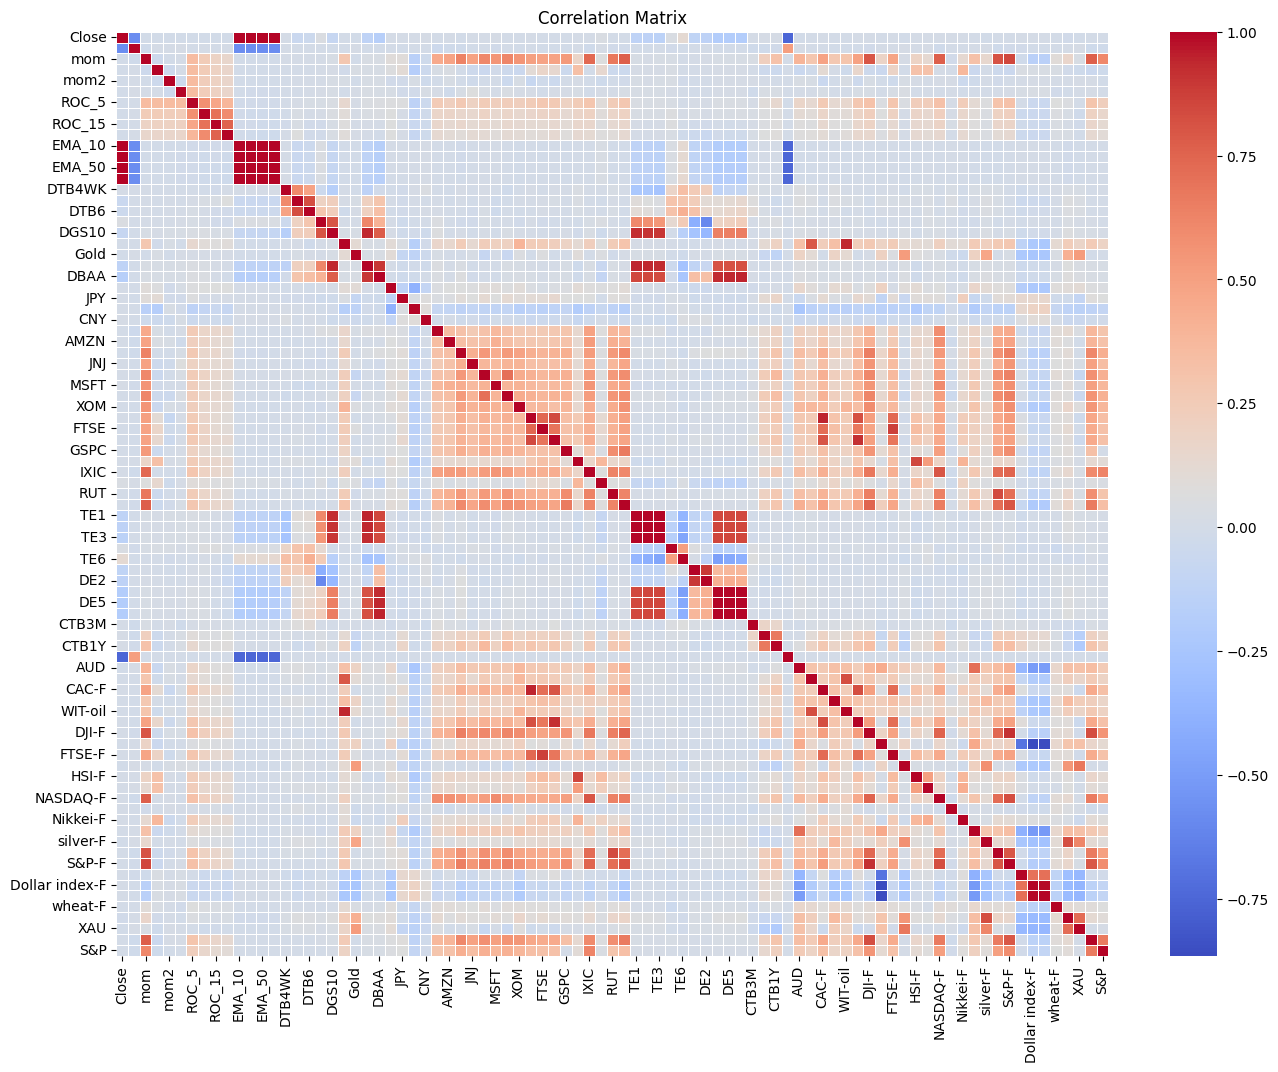

In [ ]:
# Exploratory Data Analysis (EDA)
def perform_eda(df, target_column):
    # Correlation matrix
    correlation_matrix = df.corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

target_column_name = 'Close'
perform_eda(df.select_dtypes(include=[np.number]), target_column_name)

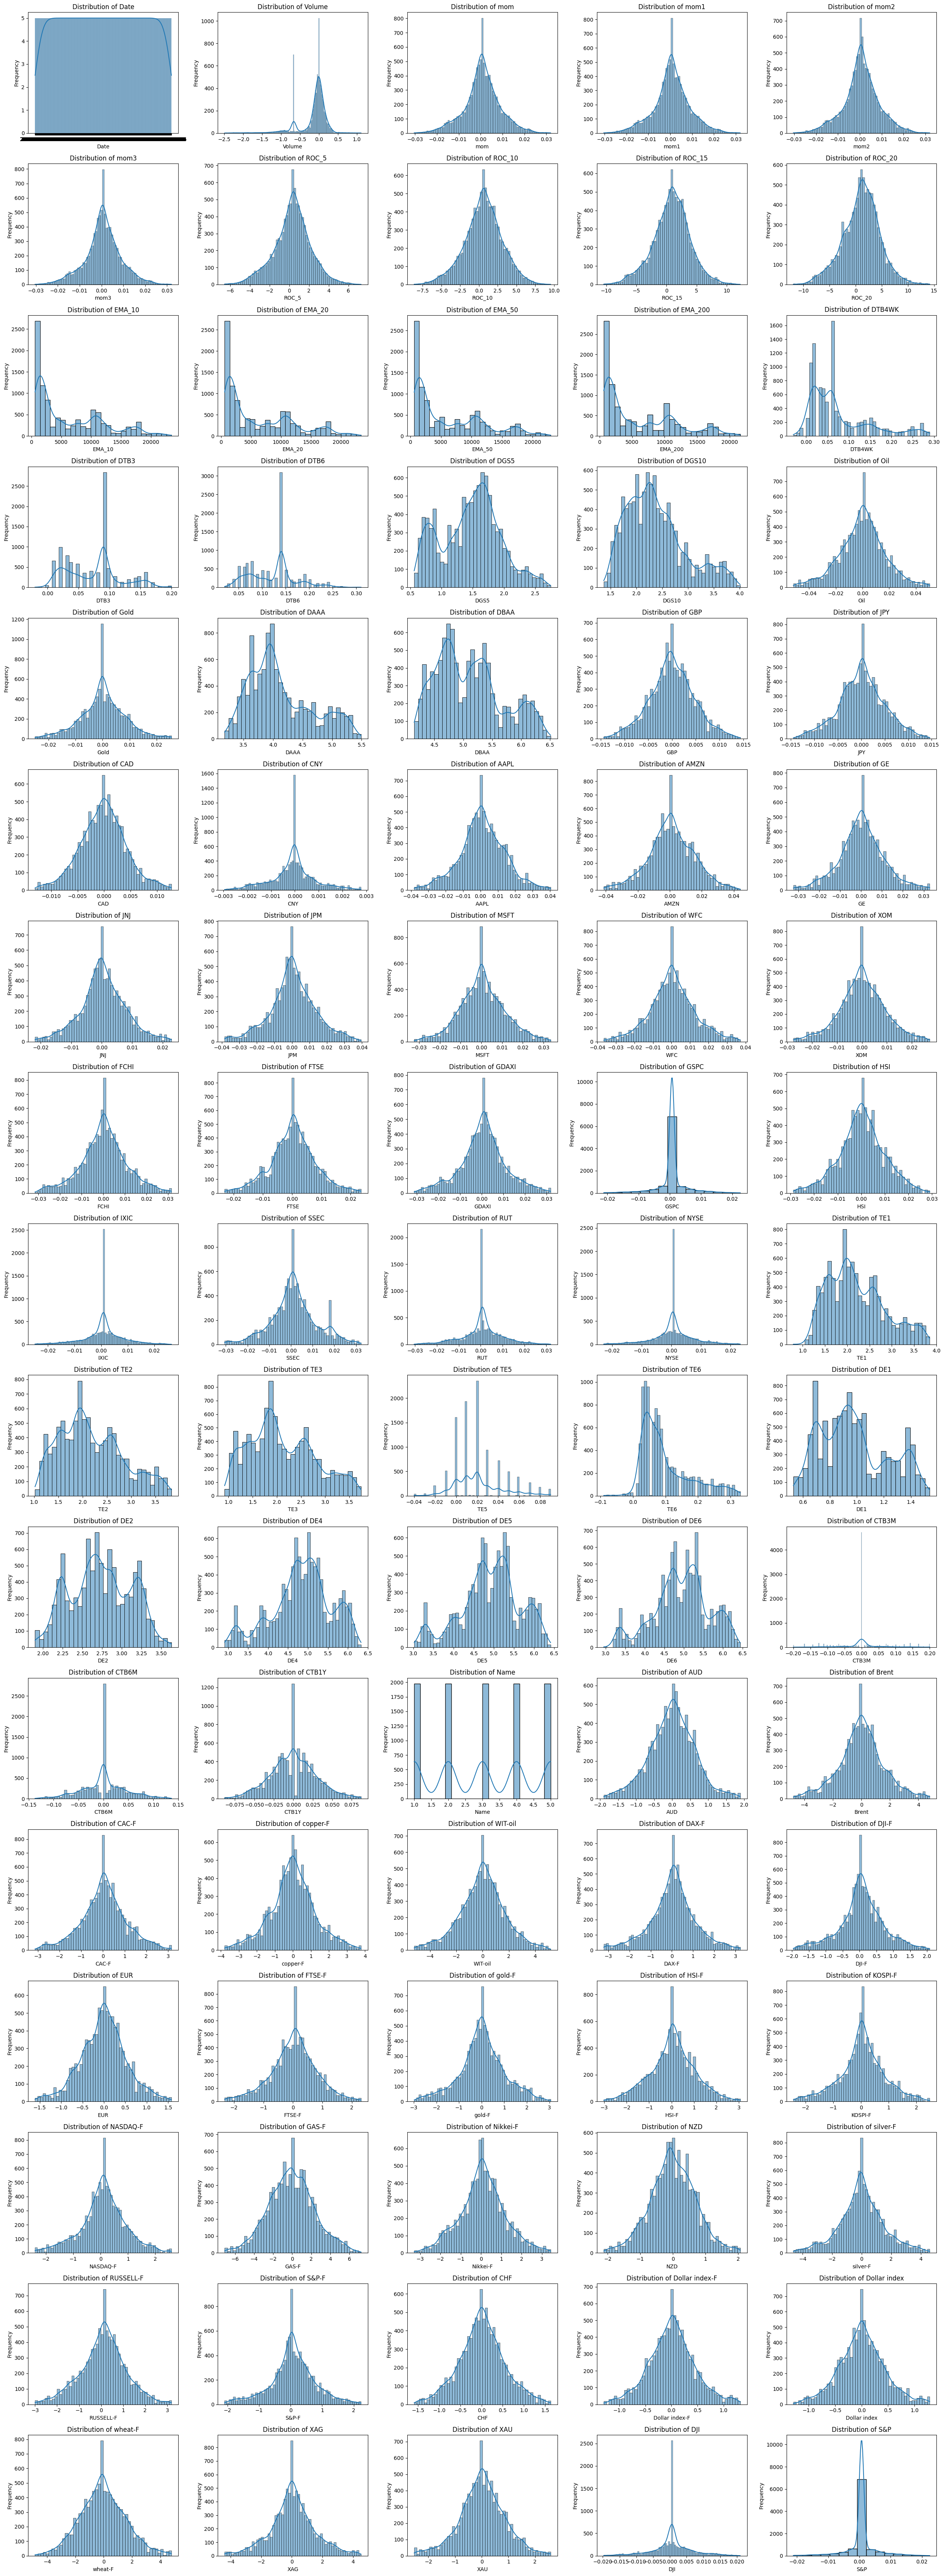

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
grid_cols = 5
feature_columns = [col for col in df.columns if col != "Close"]
grid_rows = math.ceil(len(feature_columns) / grid_cols)
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))
axes = axes.flatten()
for idx, col in enumerate(feature_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
for i in range(len(feature_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


## Feature Selection And Feature Engineering

Feature selection involves identifying and keeping the most relevant features in your dataset while removing redundant or irrelevant ones. This process helps models focus on the factors that contribute the most to predicting the target variable, leading to better accuracy and efficiency.

In [ ]:

correlated_features = df.corr(numeric_only=True)['Close'].sort_values(ascending=False)
print(correlated_features)

high_correlation_threshold = 0.6

high_positive_corr_features = correlated_features[correlated_features > high_correlation_threshold].index.tolist()

high_negative_corr_features = correlated_features[correlated_features < -high_correlation_threshold].index.tolist()



Close      1.000000
EMA_10     0.999873
EMA_20     0.999739
EMA_50     0.999420
EMA_200    0.998304
             ...   
DE6       -0.189357
DE5       -0.190716
DE4       -0.194123
Volume    -0.575212
Name      -0.751572
Name: Close, Length: 85, dtype: float64


Correlation analysis is a statistical method used to measure the strength and direction of the relationship between two variables. It is a fundamental technique in data exploration and is often used in feature selection to identify relationships between independent variables (features) and the target variable.

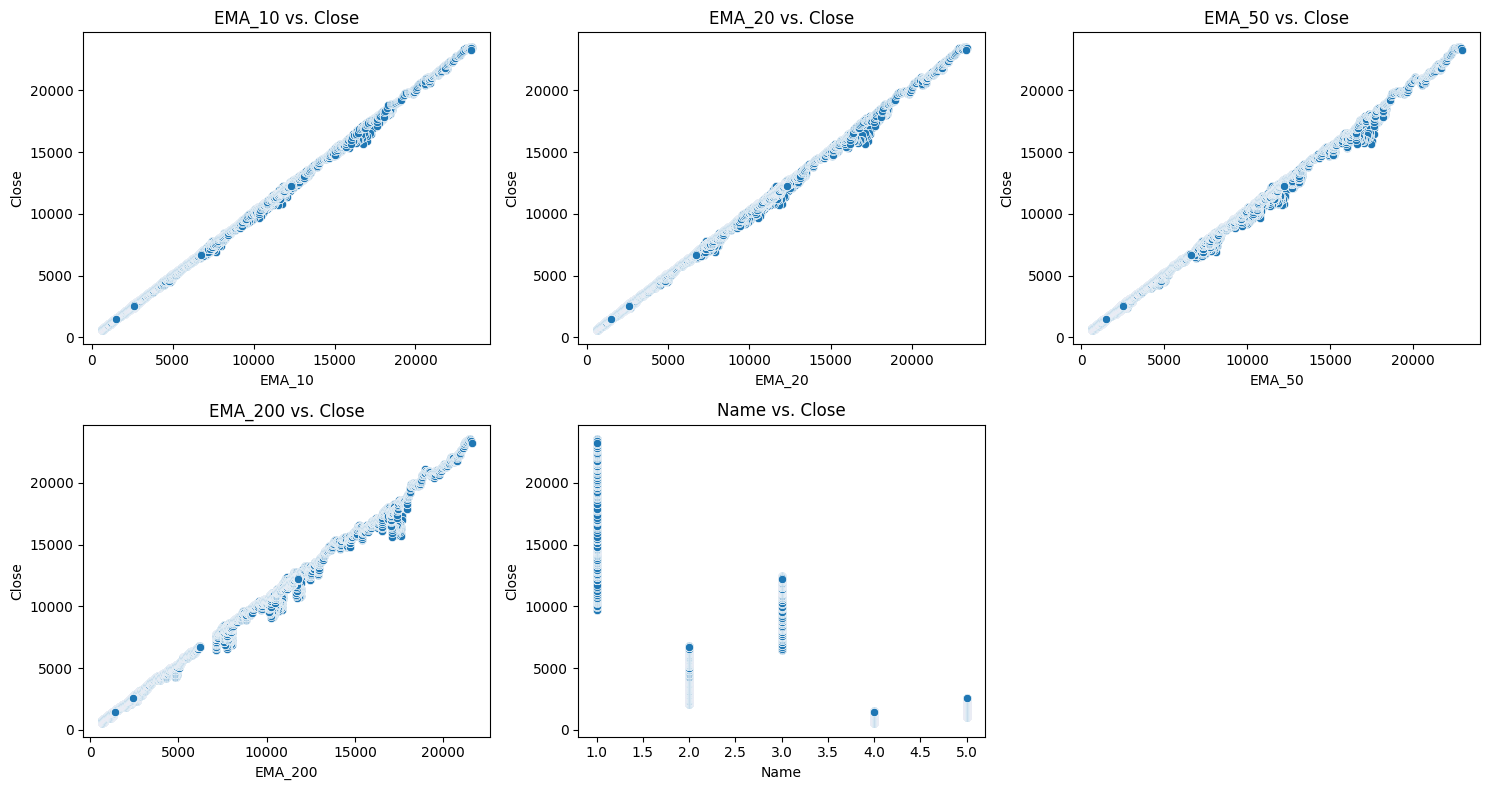

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

correlated_features = high_positive_corr_features + high_negative_corr_features
correlated_features = [feature for feature in correlated_features if feature != 'Close']
grid_cols = 3
grid_rows = math.ceil(len(correlated_features) / grid_cols)
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 5, grid_rows * 4))

axes = axes.flatten()
for idx, feature in enumerate(correlated_features):
    sns.scatterplot(x=feature, y='Close', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs. Close')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Close')

for i in range(len(correlated_features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()


Lag features are values from previous time steps (lags) of a variable used to represent temporal relationships in time-series data. These features are crucial in forecasting models as they capture historical trends, dependencies, and patterns in the data.

In [ ]:
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_RollingMean'] = df['Close'].rolling(window=3).mean()
df = df.dropna()
print(df[['Close', 'Close_Lag1', 'Close_Lag2', 'Close_RollingMean']].head())

          Close    Close_Lag1    Close_Lag2  Close_RollingMean
2   2269.149902   1115.099976  10428.049805        4604.099894
3   7184.959961   2269.149902   1115.099976        3523.069946
4    625.390015   7184.959961   2269.149902        3359.833293
5  10583.959961    625.390015   7184.959961        6131.436646
6   2308.419922  10583.959961    625.390015        4505.923299


## Dataset Spliting And Scaling

Normalization plays a critical role in maintaining consistent model performance, particularly when the data features have varying scales. In this project, we applied MinMaxScaler to numerical columns to rescale them within a set range, commonly between 0 and 1. This scaling ensures that no single feature dominates the learning process due to larger ranges and helps improve the convergence and stability of machine learning models.

In [ ]:
def scale_data(df_X, df_y):
  numerical_features_X = df_X.select_dtypes(include=['number']).columns

  if isinstance(df_y, pd.Series):
    df_y = df_y.to_frame()

  numerical_features_y = df_y.select_dtypes(include=['number']).columns
  scaler_X = MinMaxScaler()
  scaler_y = MinMaxScaler()

  df_X_scaled = df_X.copy()
  df_y_scaled = df_y.copy()
  df_X_scaled[numerical_features_X] = scaler_X.fit_transform(df_X[numerical_features_X])
  df_y_scaled[numerical_features_y] = scaler_y.fit_transform(df_y[numerical_features_y])

  return df_X_scaled, df_y_scaled.squeeze()

The train-test split is a fundamental step in preparing a machine learning model. It divides the dataset into two parts: one for training the model and the other for testing its performance. This helps evaluate how well the model generalizes to unseen data.

In [ ]:
df.dropna(inplace=True)
y = df['Close']
X = df.drop("Close", axis=1)
X['Date'] = pd.to_datetime(X['Date'], errors='coerce')
X['Date'] = X['Date'].apply(lambda date: date.toordinal() if pd.notnull(date) else pd.NaT)
X['Date'] = pd.to_numeric(X['Date'], errors='coerce')



In [ ]:
train_size = int(0.8 * len(X))

train = X.iloc[:train_size]
test = X.iloc[train_size:]

X_train, y_train = train, y.iloc[:train_size]
X_test, y_test = test, y.iloc[train_size:]

X_train, y_train = scale_data(X_train, y_train)
X_test, y_test = scale_data(X_test, y_test)

## Step-3 Model building

### Linear Regression Model

Linear Regression is one of the simplest and most widely used machine learning algorithms. It models the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a straight line through the data points.

In [ ]:
LR_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())])
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.8652000201577924
MSE: 0.012905256189471082
RMSE: 0.11360130364336089
MAE: 0.10018964860356078


### KNN Model

K-Nearest Neighbors (KNN) is a simple, non-parametric, and lazy machine learning algorithm used for classification and regression tasks. It predicts the outcome for a new data point based on the outcomes of its k nearest neighbors in the feature space.

In [ ]:
KNN_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ])
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.9545407952997623
MSE: 0.004352097704412889
RMSE: 0.06597043053075285
MAE: 0.05020681785060616


### Random Forest Model

Random Forest is a versatile and robust ensemble machine learning algorithm used for both classification and regression tasks. It builds multiple decision trees during training and combines their outputs to improve accuracy and reduce overfitting.

In [ ]:
RF_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ])
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.9995721616876014
MSE: 4.0959672513578136e-05
RMSE: 0.006399974415072152
MAE: 0.004232396501897836


### SVM with linear kernel Model

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. When paired with a linear kernel, SVM is especially powerful for datasets where the relationship between features and the target is linearly separable.

In [ ]:
SVLinear_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='linear'))
    ])
SVLinear_model.fit(X_train, y_train)
y_pred = SVLinear_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.95214784887032
MSE: 0.004581189628282473
RMSE: 0.06768448587588202
MAE: 0.06005967261734904


### SVM with Non-linear kernel Model

Support Vector Machine (SVM) is a powerful machine learning algorithm that can handle both linear and non-linear data. When dealing with non-linear data, SVM uses non-linear kernels to map the data into a higher-dimensional space where it can be separated by a hyperplane. The non-linear kernel allows SVM to learn complex decision boundaries that would be impossible to detect in the original feature space.

In [ ]:
SVR_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
    ])
SVR_model.fit(X_train, y_train)
y_pred = SVR_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.9189443696742732
MSE: 0.0077599690754926644
RMSE: 0.0880906866558132
MAE: 0.0710051500090684


### Gradient Boosting Regressor Model

Gradient Boosting is an advanced ensemble learning technique used for both classification and regression tasks. It builds a model in a sequential manner, where each new model corrects the errors of the previous ones. The Gradient Boosting Regressor is specifically used for regression tasks and is known for its high predictive accuracy.

In [ ]:
GBR_model = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
GBR_model.fit(X_train, y_train)
y_pred = GBR_model.predict(X_test)
print("Below are the evaluation metrics:")

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Below are the evaluation metrics:
R^2: 0.9993689538412359
MSE: 6.041404721102086e-05
RMSE: 0.0077726473746736295
MAE: 0.005137127433726449


## Model Selection without Hyperparameter Tuning

In [ ]:
# Model Selection without Hyperparameter Tuning with Pipelines
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'SVM Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='linear'))
    ]),
    'SVM RBF': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf'))
    ]),
    'SVR': Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
}


In [ ]:
# Train and evaluate models
results = {}
r2_scores = {}
rmse_scores = {}
mae_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

    rmse = np.sqrt(mse)
    rmse_scores[name] = rmse

    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae


In [ ]:
# Print all the evaluation metrics for each of the models
print("Below are the evaluation metrics below:")
for name, model in models.items():

    print(f"{name} R^2: {r2_scores.get(name)}")
    print(f"{name} MSE: {results.get(name)}")
    print(f"{name} RMSE: {rmse_scores.get(name)}")
    print(f"{name} MAE: {mae_scores.get(name)}")
    print("-" * 20)

Below are the evaluation metrics below:
Linear Regression R^2: 0.8652000201577924
Linear Regression MSE: 0.012905256189471082
Linear Regression RMSE: 0.11360130364336089
Linear Regression MAE: 0.10018964860356078
--------------------
KNN R^2: 0.9545407952997623
KNN MSE: 0.004352097704412889
KNN RMSE: 0.06597043053075285
KNN MAE: 0.05020681785060616
--------------------
Random Forest R^2: 0.9995721616876014
Random Forest MSE: 4.0959672513578136e-05
Random Forest RMSE: 0.006399974415072152
Random Forest MAE: 0.004232396501897836
--------------------
Gradient Boosting R^2: 0.9993689538412359
Gradient Boosting MSE: 6.041404721102086e-05
Gradient Boosting RMSE: 0.0077726473746736295
Gradient Boosting MAE: 0.005137127433726449
--------------------
SVM Linear R^2: 0.95214784887032
SVM Linear MSE: 0.004581189628282473
SVM Linear RMSE: 0.06768448587588202
SVM Linear MAE: 0.06005967261734904
--------------------
SVM RBF R^2: 0.9189443696742732
SVM RBF MSE: 0.0077599690754926644
SVM RBF RMSE: 0.0

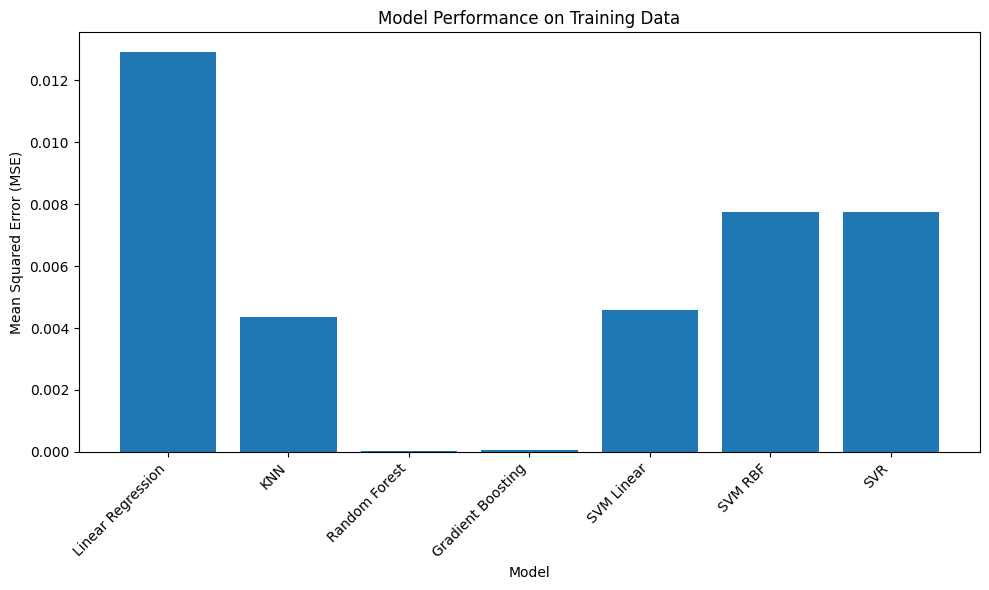

In [ ]:
# Plot the MSE of all the models for performance evaluation
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance on Training Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Find the best model based on R-squared
best_model_r2 = max(r2_scores, key=r2_scores.get)
print(f"Best model based on R-squared: {best_model_r2} with R^2: {r2_scores[best_model_r2]}")

# Find the best model based on MSE
best_model_mse = min(results, key=results.get)
print(f"Best model based on MSE: {best_model_mse} with MSE: {results[best_model_mse]}")

Best model based on R-squared: Random Forest with R^2: 0.9995721616876014
Best model based on MSE: Random Forest with MSE: 4.0959672513578136e-05


From the above analysis, we can say that Random Forest model performed well when we tested it without any hyperparameter tuning.

## Model Selection with Hyperparameter Tuning

In [ ]:
# Define the models
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsRegressor())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'SVM Linear': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='linear'))
    ]),
    'SVM RBF': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf'))
    ]),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
}

# Define the hyperparameter grids
param_grids = {
    'KNN': {'model__n_neighbors': [3, 5, 7, 9, 11], 'model__weights': ['uniform', 'distance']},
    'Random Forest': {'model__n_estimators': [100, 200], 'model__max_depth': [10, 20], 'model__min_samples_split': [2, 5], 'model__min_samples_leaf': [1, 2], 'model__max_features': ['sqrt', None]},
    'Gradient Boosting': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1]},
    'SVM Linear': {'model__C': [0.1, 1, 10]},
    'SVM RBF': {'model__C': [0.1, 1, 10], 'model__gamma': [0.01, 0.1, 1]},
    'SVR': {
        'svr__kernel': ['linear', 'rbf'],
        'svr__C': [0.1, 100],
        'svr__epsilon': [0.01, 0.1]
    }
}

# Initialize lists to store results
results_list = []

# Train and evaluate models with hyperparameter tuning
for name, model in models.items():
    print(f"Training {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring='neg_mean_squared_error',
            cv=5,
            n_jobs=-1,
            verbose=2
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = "No hyperparameter tuning"

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results_list.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2,
        'MAE': mae,
        'Best Parameters': best_params
    })

results_df = pd.DataFrame(results_list)

print("\nModel Evaluation Results:")
print(results_df)

results_df.to_csv('model_evaluation_results.csv', index=False)
print("\nResults saved to 'model_evaluation_results.csv'")


Training Linear Regression...
Training KNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for KNN: {'model__n_neighbors': 7, 'model__weights': 'distance'}
Training Random Forest...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for Random Forest: {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Training Gradient Boosting...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Training SVM Linear...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for SVM Linear: {'model__C': 0.1}
Training SVM RBF...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for SVM RBF: {'model__C': 1, 'model__gamma': 0.01}
Training SVR...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Bes

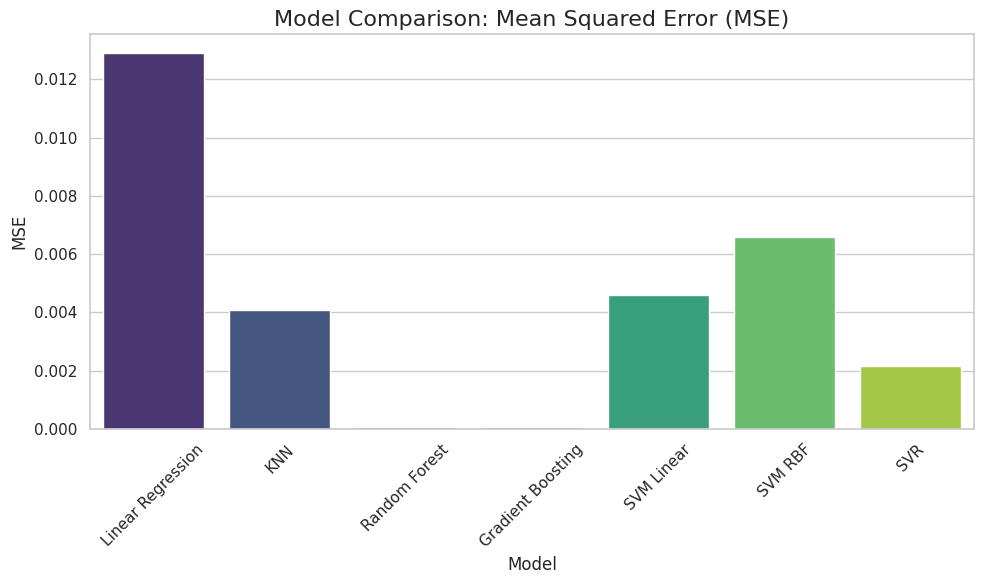

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
results_df = pd.read_csv('model_evaluation_results.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='MSE', palette='viridis')
plt.title('Model Comparison: Mean Squared Error (MSE)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
primary_metric = 'R^2'

if primary_metric == 'R^2':
    best_model_row = results_df.loc[results_df[primary_metric].idxmax()]
else:
    best_model_row = results_df.loc[results_df[primary_metric].idxmin()]

print("Best Performing Model:")
print(best_model_row)

best_model_row.to_csv('best_model_details.csv', header=True)
print("\nBest model details saved to 'best_model_details.csv'")

Best Performing Model:
Model                                              Gradient Boosting
MSE                                                         0.000049
RMSE                                                        0.007018
R^2                                                         0.999486
MAE                                                         0.004654
Best Parameters    {'model__learning_rate': 0.1, 'model__n_estima...
Name: 3, dtype: object

Best model details saved to 'best_model_details.csv'


After Hyperparameter, we can say that Gradient Boosting model performed well when we tested it with hyperparameters: {'model__learning_rate': 0.1, 'model n_estimators': 100}.

## Models Evaluation And Model performance visualization

In [ ]:
model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, R^2: {train_r2}")
print(f"Testing MSE: {test_mse}, R^2: {test_r2}")

Training MSE: 4.875972493589371e-06, R^2: 0.9999447114580168
Testing MSE: 5.1770407113882706e-05, R^2: 0.99945923972892


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())

Cross-Validation MSE Scores: [3.13614668e-05 6.58786131e-05 1.00280429e-04 4.85639449e-05
 8.29879311e-05]
Mean CV MSE: 6.581447701094236e-05


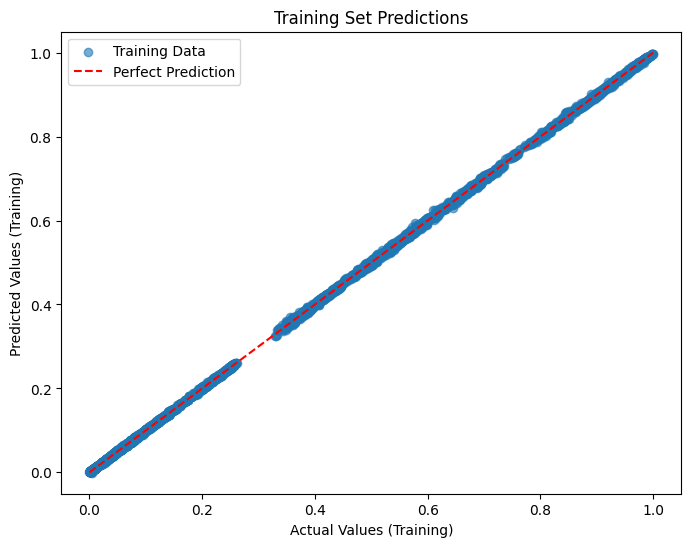

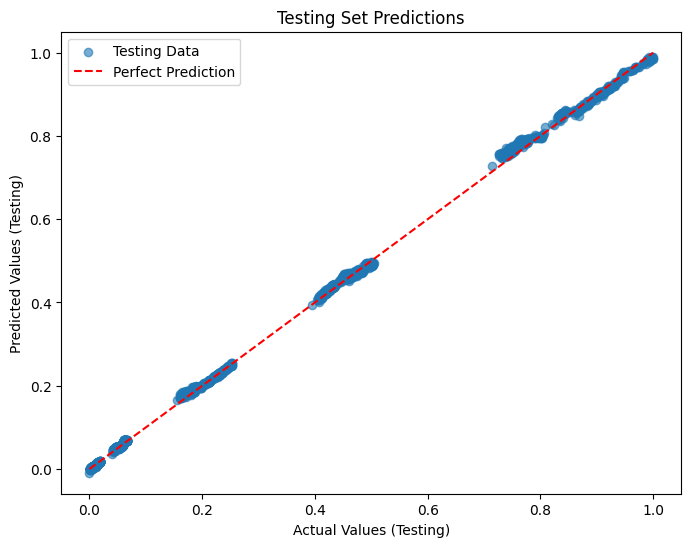

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Training Set Predictions")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, label='Testing Data', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Testing Set Predictions")
plt.legend()
plt.show()

From the above evaluation metrics and visualization plot, we can say that "Gradient Boosting Regressor" is performing really good. The MSE is really low which meant low error and R2 is really high which shows no signs of variability. It shows no signs of overfitting or underfitting in our model.